In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
from sklearn import metrics

In [5]:
from google.colab import files
 
 
uploaded = files.upload()

Saving League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv to League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv


In [6]:
import pandas as pd


lol = pd.read_csv('League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv')
print(lol)

    Team    Player Opponent Position Champion  Kills  Deaths  Assists  \
0    UOL      Boss       GS      Top  Camille      4       5        3   
1     GS     Crazy      UOL      Top     Gwen      3       1        9   
2    UOL  Ahahacik       GS   Jungle  Trundle      2       4        5   
3     GS    Mojito      UOL   Jungle    Talon      5       4       10   
4    UOL    Nomanz       GS      Mid  Leblanc      1       3        4   
..   ...       ...      ...      ...      ...    ...     ...      ...   
215  BYG     Maoan      UOL      Mid     Ryze      4       4        2   
216  UOL  Argonavt      BYG      Adc    Senna      1       3        9   
217  BYG     Doggo      UOL      Adc   Draven     10       2        4   
218  UOL    Santas      BYG  Support   Wukong      0       4        7   
219  BYG      Kino      UOL  Support    Rakan      0       5        9   

     Creep Score  Gold Earned  Champion Damage Share  Kill Participation  \
0            188        11107                  

In [8]:
lol_subset = lol[['Kills', 'Deaths',
       'Assists', 'Creep Score', 'Gold Earned']]

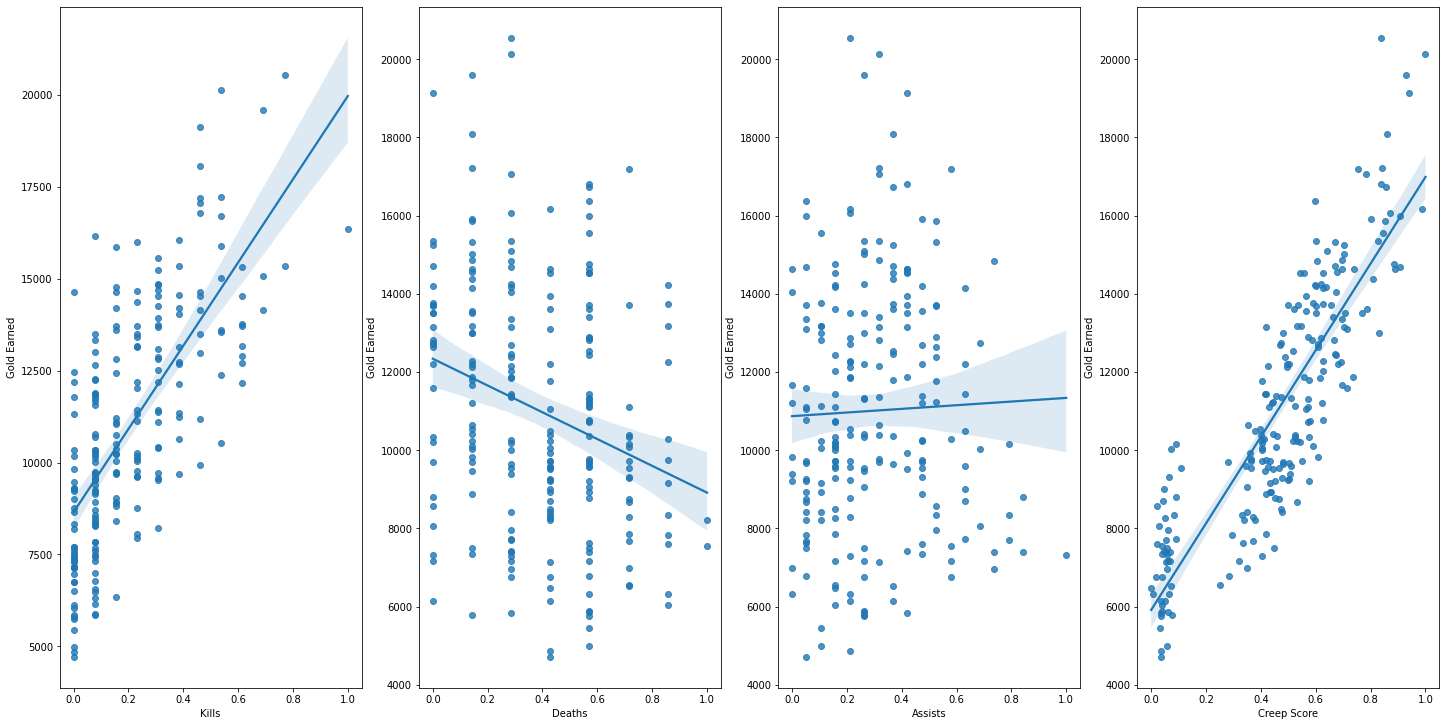

In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['Kills', 'Deaths',
       'Assists', 'Creep Score']
x = lol_subset.loc[:,column_sels]
y = lol_subset['Gold Earned']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)